# UBER Rides Data Preprocessing

### Steps for Data Cleaning and Preprocessing in Python

**Step 1: Load the Data**
- Import the dataset using libraries like `pandas` and check the first few rows to understand the structure.

**Step 2: Understand the Data**
- Analyze the dataset using descriptive statistics and metadata to understand data types, null values, and duplicates.

**Step 3: Handle Duplicates**
- Identify and remove duplicate rows to maintain data consistency.

**Step 4: Handle Missing Values**
- Decide whether to drop rows with null values or fill them with appropriate defaults (e.g., mean, median, or a placeholder).

**Step 5: Fix Data Types**
- Ensure each column has the correct data type (e.g., convert dates to `datetime`, numerical columns to `float` or `int`, and categorical columns to `category`).

**Step 6: Remove Unnecessary Columns**
- Drop columns that are not needed for analysis to simplify the dataset.

**Step 7: Handle Outliers**
- Detect and handle outliers in numerical columns to ensure data is within a reasonable range.

**Step 8: Save Cleaned Data**
- Save the cleaned dataset in a preferred format (Excel, CSV, etc.) for further use.

**Step 9: Perform Advanced Data Analysis**
- Use statistical methods and tools to derive insights, and prepare the dataset for machine learning if needed.

**Step 10: Visualize Data**
- Create visualizations like histograms, scatter plots, and bar charts to explore patterns and relationships in the data.


### Step 1: Load the Data

In [2]:
import pandas as pd

# Load data into a DataFrame
file_path = "Uber Dataset.csv"
df = pd.read_csv(file_path)

# View the first few rows
print(df.head())


                  Date   Time     Booking ID         Booking Status  \
0  2024-12-26 00:00:00  02:30  CNR1289824197                Success   
1  2024-12-19 00:00:00  12:00  CNR8391233393                Success   
2  2024-12-09 00:00:00  23:45  CNR4738122268    Cancelled by Driver   
3  2024-12-13 00:00:00  12:45  CNR7895469453                Success   
4  2024-12-26 00:00:00  20:45  CNR9436215893  Cancelled by Customer   

  Customer ID Vehicle Type Pickup Location Drop Location  Avg VTAT  Avg CTAT  \
0   CUS305139         Mini          Malden        Boston      10.0      11.0   
1   CUS670211   Prime Plus          Quincy   Springfield       4.0       5.0   
2   CUS495406   Prime Plus     Marlborough    Winchester       NaN       NaN   
3   CUS596831   Prime Plus      Winchester       Duxbury      14.0      14.0   
4   CUS223143         Bike         Taunton    Winchester       NaN       NaN   

   Cancelled Rides by Customer Reason for Cancelling by Customer  \
0                       

### Step 2: Exploring the Data

In [3]:
# Get basic info
print(df.info())  # Check data types and non-null counts

# Get descriptive statistics
print(df.describe())  # Summary for numerical columns
print(df.describe(include='object'))  # Summary for categorical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               50000 non-null  object 
 1   Time                               50000 non-null  object 
 2   Booking ID                         50000 non-null  object 
 3   Booking Status                     50000 non-null  object 
 4   Customer ID                        50000 non-null  object 
 5   Vehicle Type                       50000 non-null  object 
 6   Pickup Location                    50000 non-null  object 
 7   Drop Location                      50000 non-null  object 
 8   Avg VTAT                           33336 non-null  float64
 9   Avg CTAT                           33336 non-null  float64
 10  Cancelled Rides by Customer        50000 non-null  int64  
 11  Reason for Cancelling by Customer  3778 non-null   obj

In [4]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [5]:
# Check for null values
print(df.isnull().sum())

Date                                     0
Time                                     0
Booking ID                               0
Booking Status                           0
Customer ID                              0
Vehicle Type                             0
Pickup Location                          0
Drop Location                            0
Avg VTAT                             16664
Avg CTAT                             16664
Cancelled Rides by Customer              0
Reason for Cancelling by Customer    46222
Cancelled Rides by Driver                0
Reason for Cancelling by Driver      40411
Incomplete Rides                         0
Incomplete Rides Reason              46703
Booking Value                        16664
Ride Distance                        16664
Driver Ratings                       16664
Customer Rating                      16664
dtype: int64


### Step 3: Handle Duplicates

In [6]:
# Drop duplicate rows
df = df.drop_duplicates()

# Verify
print(f"Duplicate rows after cleaning: {df.duplicated().sum()}")


Duplicate rows after cleaning: 0


### Step 4: Handle Missing Values

In [9]:
# Fill missing numerical columns with mean
columns_with_mean = ['Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']

for column in columns_with_mean:
    df[column] = df[column].fillna(df[column].mean())

# For categorical columns like 'Reason for Cancelling by Driver' and 'Incomplete Rides Reason'
# Replace with a default value such as 'Unknown'
df['Reason for Cancelling by Driver'] = df['Reason for Cancelling by Driver'].fillna('Unknown')
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna('Unknown')

# Check if nulls are handled
print(df.isnull().sum())

Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Cancelled Rides by Customer          0
Reason for Cancelling by Customer    0
Cancelled Rides by Driver            0
Reason for Cancelling by Driver      0
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
dtype: int64


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               50000 non-null  object 
 1   Time                               50000 non-null  object 
 2   Booking ID                         50000 non-null  object 
 3   Booking Status                     50000 non-null  object 
 4   Customer ID                        50000 non-null  object 
 5   Vehicle Type                       50000 non-null  object 
 6   Pickup Location                    50000 non-null  object 
 7   Drop Location                      50000 non-null  object 
 8   Avg VTAT                           50000 non-null  float64
 9   Avg CTAT                           50000 non-null  float64
 10  Cancelled Rides by Customer        50000 non-null  int64  
 11  Reason for Cancelling by Customer  50000 non-null  obj

In [12]:
print(df.describe())

           Avg VTAT      Avg CTAT  Cancelled Rides by Customer  \
count  50000.000000  50000.000000                 50000.000000   
mean       7.999850      7.963403                     0.075560   
std        3.538575      3.529538                     0.264295   
min        1.000000      1.000000                     0.000000   
25%        6.000000      6.000000                     0.000000   
50%        7.999850      7.963403                     0.000000   
75%       10.000000     10.000000                     0.000000   
max       15.000000     15.000000                     1.000000   

       Cancelled Rides by Driver  Incomplete Rides  Booking Value  \
count               50000.000000       50000.00000   50000.000000   
mean                    0.191780           0.06594     432.564495   
std                     0.393705           0.24818     230.020320   
min                     0.000000           0.00000      50.000000   
25%                     0.000000           0.00000     290.0

### Step 5: Fix Data Types

In [13]:
# Convert dates
df['Date'] = pd.to_datetime(df['Date'])

# Convert numerical columns
df['Booking Value'] = pd.to_numeric(df['Booking Value'], errors='coerce')

# Ensure categorical columns have the right type
categorical_columns = ['Booking Status', 'Vehicle Type']
df[categorical_columns] = df[categorical_columns].astype('category')


### Step 6: Remove Unnecessary Columns

In [14]:
# Drop unnecessary columns
df = df.drop(['Incomplete Rides Reason'], axis=1)


### Step 7: Handle Outliers

In [15]:
# Remove outliers in 'Booking Value' (example: values above 3 standard deviations)
from scipy.stats import zscore

df = df[(zscore(df['Booking Value']) < 3)]
print(df)

            Date   Time     Booking ID         Booking Status Customer ID  \
0     2024-12-26  02:30  CNR1289824197                Success   CUS305139   
1     2024-12-19  12:00  CNR8391233393                Success   CUS670211   
2     2024-12-09  23:45  CNR4738122268    Cancelled by Driver   CUS495406   
3     2024-12-13  12:45  CNR7895469453                Success   CUS596831   
4     2024-12-26  20:45  CNR9436215893  Cancelled by Customer   CUS223143   
...          ...    ...            ...                    ...         ...   
49995 2024-12-12  06:45  CNR7236945914             Incomplete   CUS398063   
49996 2024-12-15  05:00  CNR1910011874                Success   CUS870591   
49997 2024-12-07  00:30  CNR1635530271  Cancelled by Customer   CUS894125   
49998 2024-12-16  21:30  CNR8962436139                Success   CUS554715   
49999 2024-12-25  23:15  CNR1523447864                Success   CUS123196   

      Vehicle Type Pickup Location Drop Location  Avg VTAT   Avg CTAT  \
0 

### Step 8: Save Cleaned Data

In [16]:
# Save the cleaned DataFrame to a CSV file
df.to_csv("Cleaned_Massachusetts_Booking_Data.csv", index=False)

print("Cleaned data saved as CSV successfully!")


Cleaned data saved as CSV successfully!


In [23]:
# Print all column names
print(df.columns.tolist())


['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for Cancelling by Customer', 'Cancelled Rides by Driver', 'Reason for Cancelling by Driver', 'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']


In [24]:
with open('Cleaned_Massachusetts_Booking_Data.csv', 'r') as file:
    print(file.readline())  # Print the header row


Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for Cancelling by Customer,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating



### Step 9: Perform Advanced Data Analysis

In [17]:
import numpy as np

# Statistical analysis
print(f"Mean Booking Value: {np.mean(df['Booking Value'])}")
print(f"Median Booking Value: {np.median(df['Booking Value'])}")


Mean Booking Value: 423.2967102985474
Median Booking Value: 432.56449484041275


### Machine Learning Random Forest Classifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Example: Train a model to predict booking status
X = df[['Ride Distance', 'Avg VTAT', 'Avg CTAT']]  # Features
y = df['Booking Status']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f"Model Accuracy: {model.score(X_test, y_test)}")


Model Accuracy: 0.8534613441131885


### Step 10: Visualize Data

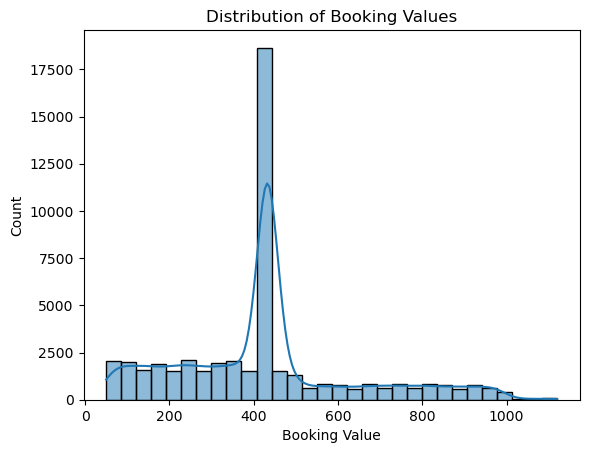

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize booking values
sns.histplot(df['Booking Value'], bins=30, kde=True)
plt.title('Distribution of Booking Values')
plt.show()

In [29]:
import os

# Check and remove existing file
output_file = "Cleaned_Massachusetts_Booking_Data.csv"
if os.path.exists(output_file):
    os.remove(output_file)

# Save the file with corrected header
columns = ['Ride_Date', 'Ride_Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 
           'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 
           'Cancelled Rides by Customer', 'Reason for Cancelling by Customer', 
           'Cancelled Rides by Driver', 'Reason for Cancelling by Driver', 
           'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']

df.to_csv(output_file, index=False, header=columns)
print("File saved successfully!")


File saved successfully!
